In [1]:
import dask.dataframe as dd
from dask.distributed import Client
from matplotlib import pyplot as plt
client = Client()

In [2]:
%time df = dd.read_csv('C:/Users/Scott Burklund/OneDrive - Preverity, Inc/Personal/data_science/Python/python_dask/data/nyc-parking-tickets/*2017.csv')

Wall time: 97.7 ms


In [3]:
%time df

Wall time: 0 ns


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=33,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,int64,object,object,object,int64,int64,int64,int64,float64,int64,int64,int64,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,int64,object,int64,object,object,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: dataframe-sum-agg, 166 tasks

In [5]:
%time missing_count = ((missing_values / df.index.size) * 100)
%time missing_count

Wall time: 2.99 ms
Wall time: 0 ns


Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 235 tasks

In [6]:
%time missing_count_pct = missing_count.compute()
%time missing_count_pct

Wall time: 58.8 s
Wall time: 0 ns


Summons Number                         0.000000
Plate ID                               0.006739
Registration State                     0.000000
Plate Type                             0.000000
Issue Date                             0.000000
Violation Code                         0.000000
Vehicle Body Type                      0.395361
Vehicle Make                           0.676199
Issuing Agency                         0.000000
Street Code1                           0.000000
Street Code2                           0.000000
Street Code3                           0.000000
Vehicle Expiration Date                0.000000
Violation Location                    19.183510
Violation Precinct                     0.000000
Issuer Precinct                        0.000000
Issuer Code                            0.000000
Issuer Command                        19.093212
Issuer Squad                          19.101506
Violation Time                         0.000583
Time First Observed                   92

In [7]:
%time columns_to_drop = missing_count_pct[missing_count_pct > 60].index
%time df_dropped = df.drop(columns_to_drop, axis=1).persist()

Wall time: 0 ns
Wall time: 203 ms


In [8]:
%time df_dropped.head(10)

Wall time: 17.9 s


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Law Section,Sub Division,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Feet From Curb,Violation Post Code,Violation Description
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,1111,D,NaN,NaN,NaN,GY,2001,0,NaN,FAILURE TO STOP AT RED LIGHT
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,1111,D,NaN,NaN,NaN,GY,2001,0,NaN,FAILURE TO STOP AT RED LIGHT
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,1111,C,NaN,NaN,NaN,BK,2004,0,NaN,BUS LANE VIOLATION
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,408,l2,Y,0700A,0700P,WH,2007,0,04,47-Double PKG-Midtown
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,408,h1,Y,0700A,0700P,WHITE,2007,0,31 6,69-Failure to Disp Muni Recpt
5,5096917368,FZD8593,NY,PAS,06/13/2017,7,SUBN,ME/BE,V,0,...,1111,D,NaN,NaN,NaN,WH,2012,0,NaN,FAILURE TO STOP AT RED LIGHT
6,1413609545,X20DCM,NJ,PAS,08/03/2016,40,SDN,TOYOT,P,54070,...,408,C3,BBBBBBB,ALL,ALL,WHITE,0,1,NaN,NaN
7,4628525523,326SF9,MA,PAS,12/21/2016,36,UT,BMW,V,0,...,1180,B,NaN,NaN,NaN,NaN,2001,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
8,4627113330,HCA5464,NY,OMS,11/21/2016,36,SUBN,DODGE,V,0,...,1180,B,NaN,NaN,NaN,BK,2016,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION
9,4006478550,VAD7274,VA,PAS,10/05/2016,5,4D,BMW,V,0,...,1111,C,NaN,NaN,NaN,BLK,2008,0,NaN,BUS LANE VIOLATION


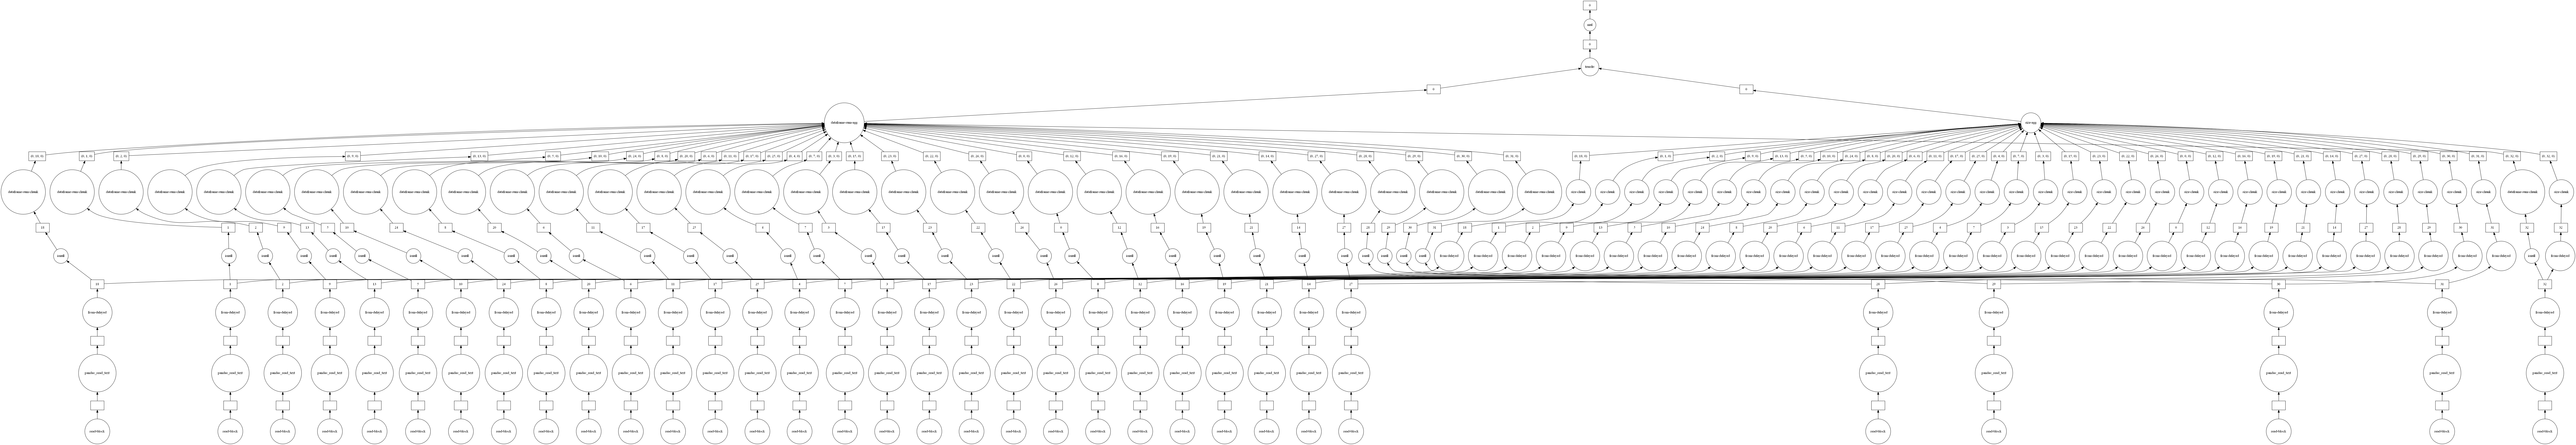

In [9]:
missing_count.visualize()